## Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from test import test_function, prepare_feat
from collections import Counter
from sklearn.utils import resample
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = 'C:/Users/ander/LightHouseNotes/deployment-project'
message = pd.read_csv(path+'/data/data.csv')
message = message[(message.ApplicantIncome < 60000) & (message.LoanAmount < 400)]
message


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [6]:
message.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            576 non-null    object 
 1   Gender             564 non-null    object 
 2   Married            574 non-null    object 
 3   Dependents         563 non-null    object 
 4   Education          576 non-null    object 
 5   Self_Employed      547 non-null    object 
 6   ApplicantIncome    576 non-null    int64  
 7   CoapplicantIncome  576 non-null    float64
 8   LoanAmount         576 non-null    float64
 9   Loan_Amount_Term   562 non-null    float64
 10  Credit_History     529 non-null    float64
 11  Property_Area      576 non-null    object 
 12  Loan_Status        576 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 63.0+ KB


Look at some basic statistics for numerical variables.

In [7]:
message.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,576.000000,576.000000,576.000000,562.000000,529.000000
mean,4816.053819,1635.485972,136.343750,342.170819,0.844991
std,3789.354747,2951.959824,59.542107,65.323978,0.362256
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2863.000000,0.000000,100.000000,360.000000,1.000000
50%,3749.000000,1257.500000,125.500000,360.000000,1.000000
75%,5541.000000,2312.000000,160.250000,360.000000,1.000000
max,39147.000000,41667.000000,380.000000,480.000000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [8]:
#insight
print('Applicant having a credit history:', len(message[message.Credit_History == 1]))

print('\nPercentage of applicant having a credit history:', 
      round(len(message[message.Credit_History == 1])/len(message.Credit_History)*100,2), '%')

print('\nPercentage of applicant having a credit history who received loan:', 
      round(len(message[(message.Credit_History == 1) & (message.Loan_Status == 'Y')])
      /len(message[(message.Credit_History == 1)])*100,2), '%')

print('\nPercentage of applicant not having a credit history who received loan:', 
      round(len(message[(message.Credit_History == 0) & (message.Loan_Status == 'Y')])
      /len(message[(message.Credit_History == 1)])*100,2), '%')


Applicant having a credit history: 447

Percentage of applicant having a credit history: 77.6 %

Percentage of applicant having a credit history who received loan: 80.31 %

Percentage of applicant not having a credit history who received loan: 1.34 %


In [9]:
#average Applicant income of approved and rejected
print(message[message.Loan_Status == 'Y'].CoapplicantIncome.mean())
print(message[message.Loan_Status == 'N'].CoapplicantIncome.mean())


1521.7322999716
1894.0170454545455


In [10]:
#insight
print('Percentage of applicant income under the mean:',
      round(len(message[message.ApplicantIncome <= message.ApplicantIncome.mean()])
          /len(message.ApplicantIncome)*100,2), '%')
 
print('\nPercentage of applicant income over the mean: ', 
      round(len(message[message.ApplicantIncome > message.ApplicantIncome.mean()])
          /len(message.ApplicantIncome)*100,2), '%')

print('\n\nPercentage of Coapplicant income under the mean:',
      round(len(message[message.CoapplicantIncome <= message.CoapplicantIncome.mean()])
          /len(message.ApplicantIncome)*100,2), '%')
 
print('\nPercentage of Coapplicant income over the mean: ', 
      round(len(message[message.CoapplicantIncome > message.CoapplicantIncome.mean()])
          /len(message.CoapplicantIncome)*100,2), '%')


Percentage of applicant income under the mean: 68.06 %

Percentage of applicant income over the mean:  31.94 %


Percentage of Coapplicant income under the mean: 57.12 %

Percentage of Coapplicant income over the mean:  42.88 %


In [11]:
#insight
print(f'Applicant income mean:\t {message.ApplicantIncome.mean()}\nApplicant income median:\t{message.ApplicantIncome.median()}')
print(f'\nCoApplicant income mean: {message.CoapplicantIncome.mean()}\nCoApplicant income median:\t{message.CoapplicantIncome.median()}')

print('\n\nDistance between the mean and the median of the applicant income:',  
      round(message.ApplicantIncome.mean() - message.ApplicantIncome.median(),2))
print('Distance between the mean and the median of the applicant income:',  
      round(message.CoapplicantIncome.mean() - message.CoapplicantIncome.median(),2))

print('\n\nPercentage of the applicant income between its mean and median:',  
      round(len(message[(message.ApplicantIncome <= message.ApplicantIncome.mean())
                        &(message.ApplicantIncome >= message.ApplicantIncome.median())])
                        /len(message.ApplicantIncome)*100,2), '%')

print('Percentage of the Coapplicant income between its mean and median:',  
      round(len(message[(message.CoapplicantIncome <= message.CoapplicantIncome.mean())
                        &(message.CoapplicantIncome >= message.CoapplicantIncome.median())])
                        /len(message.CoapplicantIncome)*100,2), '%')



Applicant income mean:	 4816.053819444444
Applicant income median:	3749.0

CoApplicant income mean: 1635.4859722025
CoApplicant income median:	1257.5


Distance between the mean and the median of the applicant income: 1067.05
Distance between the mean and the median of the applicant income: 377.99


Percentage of the applicant income between its mean and median: 18.06 %
Percentage of the Coapplicant income between its mean and median: 7.12 %


Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [12]:
#data exploration
print('Unique values in Credit History: ', message.Credit_History.unique())
print('\nUnique values in Property Area: ', message.Property_Area.unique())
print('\nUnique values in gender:', message.Gender.unique())
print('\nUnique values in married:', message.Married.unique())
print('\nUnique values in education:', message.Education.unique())
print('\nUnique values in self employed:', message.Self_Employed.unique())
print('\nUnique values in loan amount term:', message.Loan_Amount_Term.unique())
print('\nUnique values in Dependents:', message.Dependents.unique())
print('\nNumber of unique entries:', len(message.Loan_ID.unique()))


Unique values in Credit History:  [ 1.  0. nan]

Unique values in Property Area:  ['Rural' 'Urban' 'Semiurban']

Unique values in gender: ['Male' 'Female' nan]

Unique values in married: ['Yes' 'No' nan]

Unique values in education: ['Graduate' 'Not Graduate']

Unique values in self employed: ['No' 'Yes' nan]

Unique values in loan amount term: [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]

Unique values in Dependents: ['1' '0' '2' '3+' nan]

Number of unique entries: 576


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [13]:
#data exploration
print('Loans approval:', Counter(message.Loan_Status), '\n')
print('Gender:', Counter(message.Gender), '\n')
print('Marital status:', Counter(message.Married), '\n')
print('Education level:',Counter(message.Education), '\n')
print('Employment status:',Counter(message.Self_Employed), '\n')
print('Property:', Counter(message.Property_Area), '\n')
print('Number of dependants:', Counter(message.Dependents), '\n')
print('Credit history:', Counter(message.Credit_History), '\n')
print('Loan term:', Counter(message.Loan_Amount_Term), '\n')


Loans approval: Counter({'Y': 400, 'N': 176}) 

Gender: Counter({'Male': 457, 'Female': 107, nan: 12}) 

Marital status: Counter({'Yes': 371, 'No': 203, nan: 2}) 

Education level: Counter({'Graduate': 449, 'Not Graduate': 127}) 

Employment status: Counter({'No': 472, 'Yes': 75, nan: 29}) 

Property: Counter({'Semiurban': 222, 'Urban': 186, 'Rural': 168}) 

Number of dependants: Counter({'0': 327, '2': 96, '1': 95, '3+': 45, nan: 13}) 

Credit history: Counter({1.0: 447, 0.0: 82, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1}) 

Loan term: Counter({360.0: 481, 180.0: 40, 480.0: 14, 300.0: 12, 84.0: 4, 120.0: 3, 240.0: 3, 60.0: 2, 36.0: 2, nan: 1, nan: 1, nan: 1,

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



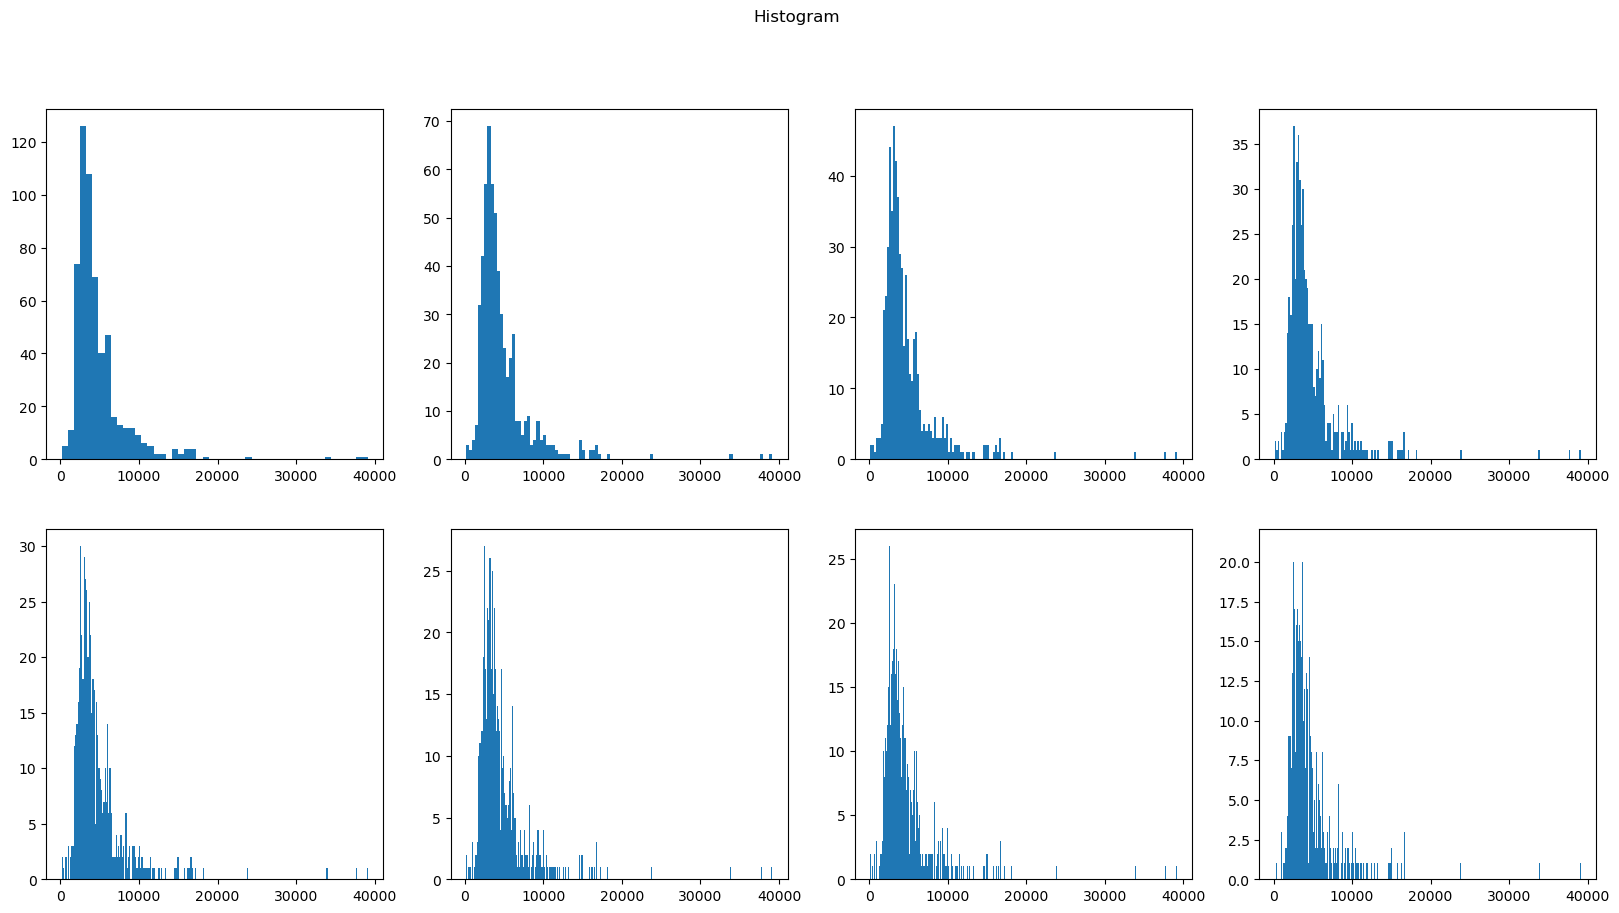

In [14]:
fig, plots = plt.subplots(2, 4, figsize = (20, 10))
fig.suptitle('Histogram')
s = 1
for i in range(2):
    for j in range(4):
        plots[i, j].hist(message['ApplicantIncome'], bins = (i+j+s)*50)
    s = 4
plt.show()


Look at box plots to understand the distributions. 

In [15]:
fig = px.box(px.data.tips(), y = message.ApplicantIncome, points='all')
fig.show()

Look at the distribution of income segregated  by `Education`

In [16]:
fig = px.box(px.data.tips(), x= message.Education, y = message.ApplicantIncome, points="all")
fig.show()

Look at the histogram and boxplot of LoanAmount

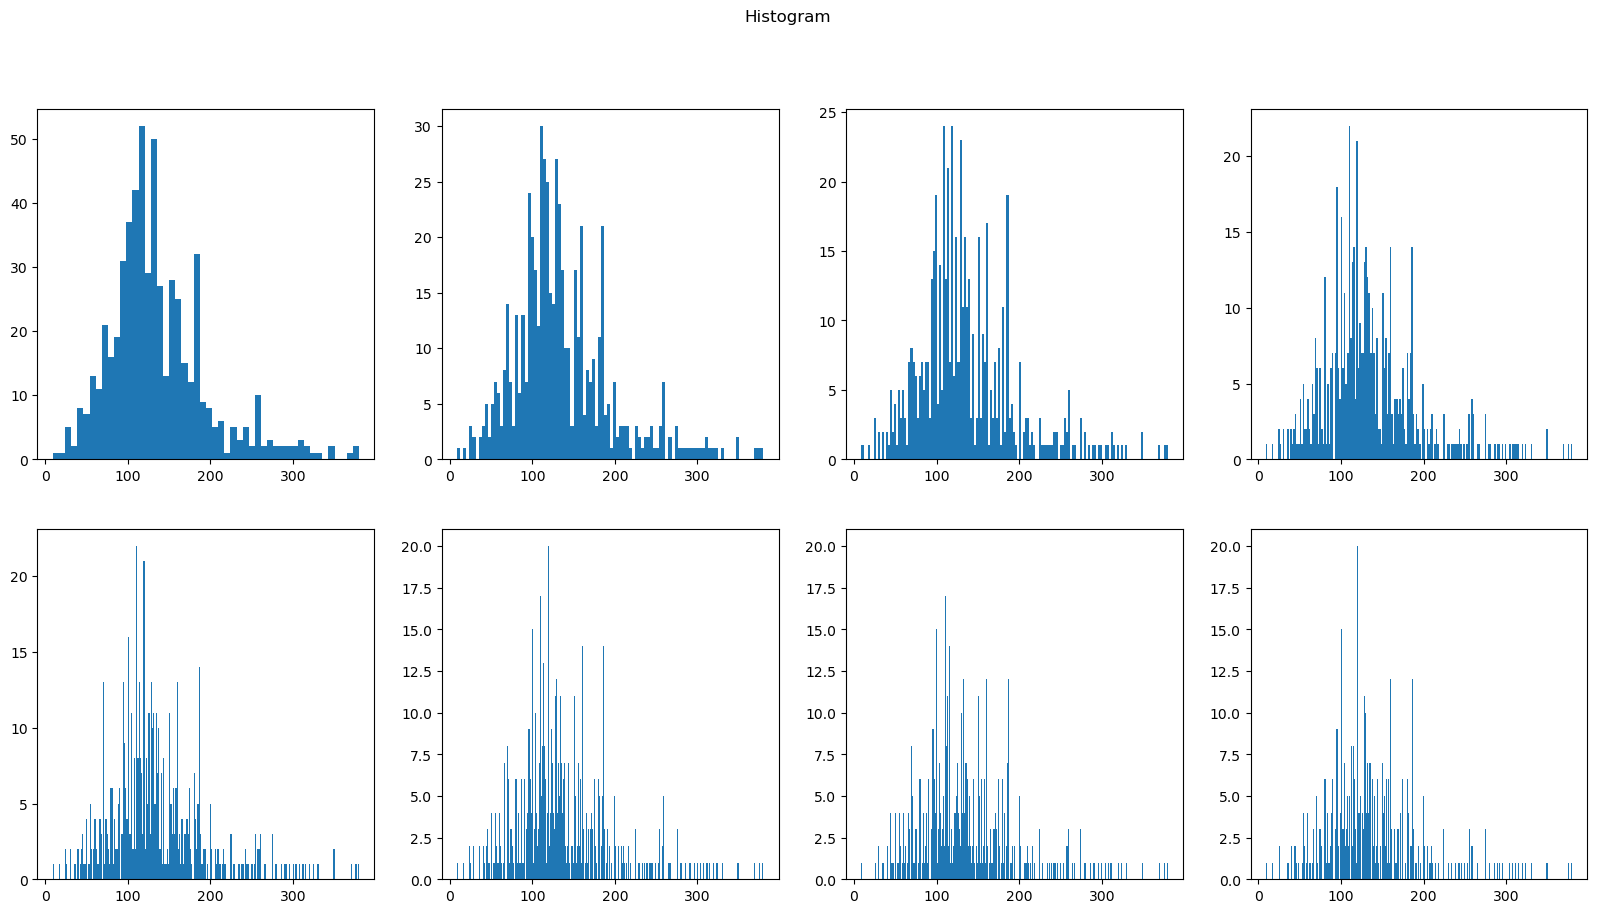

In [17]:
fig, plots = plt.subplots(2, 4, figsize = (20, 10))
fig.suptitle('Histogram')
s = 1
for i in range(2):
    for j in range(4):
        plots[i, j].hist(message['LoanAmount'], bins = (i+j+s)*50)
    s = 4
plt.show()

In [18]:
fig = px.box(px.data.tips(), y = message.LoanAmount, points='all')
fig.show()

In [19]:
fig = px.box(px.data.tips(), x= message.Education, y = message.LoanAmount, points="all")
fig.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [20]:
# statistics of LoanAmount and ApplicantIncome segregated by Loan_Status and gender
gender = pd.pivot_table(message, values = ['LoanAmount', 'ApplicantIncome'], 
                        index = ['Gender'], columns = ['Loan_Status'],
                        aggfunc = {'LoanAmount': [np.mean, min, max],
                                   'ApplicantIncome': [np.mean, min, max]
                                  })
gender

ApplicantIncome                                              \
                        max                mean               min         
Loan_Status               N      Y            N            Y    N     Y   
Gender                                                                    
Female                11500  18165  4154.166667  4502.915493  416   210   
Male                  33846  39147  5007.540741  4801.860248  150  1025   

            LoanAmount                                             
                   max               mean               min        
Loan_Status          N      Y           N           Y     N     Y  
Gender                                                             
Female           350.0  280.0  128.694444  113.816901   9.0  30.0  
Male             376.0  380.0  145.911111  136.990683  35.0  17.0

In [21]:
# statistics of LoanAmount and ApplicantIncome segregated by Loan_Status and education
education = pd.pivot_table(message, values = ['LoanAmount', 'ApplicantIncome'], 
                        index = ['Education'], columns = ['Loan_Status'],
                        aggfunc = {'LoanAmount': [np.mean, min, max],
                                   'ApplicantIncome': [np.mean, min, max]
                        })
education

ApplicantIncome                                             \
                         max                mean               min        
Loan_Status                N      Y            N           Y     N    Y   
Education                                                                 
Graduate               33846  39147  5151.674419  5070.78125   150  645   
Not Graduate            7660  18165  3752.829787  3880.60000  1442  210   

             LoanAmount                                             
                    max               mean               min        
Loan_Status           N      Y           N           Y     N     Y  
Education                                                           
Graduate          376.0  380.0  149.000000  138.359375   9.0  17.0  
Not Graduate      218.0  279.0  122.234043  116.162500  35.0  25.0

In [22]:
# statistics of LoanAmount and ApplicantIncome segregated by Loan_Status and marital status
history = pd.pivot_table(message, values = ['LoanAmount', 'ApplicantIncome'], 
                        index = ['Credit_History'], columns = ['Loan_Status'],
                        aggfunc = {'LoanAmount': [np.mean, min, max],
                                   'ApplicantIncome': [np.mean, min, max]
                        })
history

ApplicantIncome                                               \
                           max                mean                min         
Loan_Status                  N      Y            N            Y     N     Y   
Credit_History                                                                
0.0                      16250   5285  4453.407895  4013.000000  1500  2137   
1.0                      33846  39147  5108.738636  4944.479109   150   210   

               LoanAmount                                             
                      max               mean               min        
Loan_Status             N      Y           N           Y     N     Y  
Credit_History                                                        
0.0                 376.0  166.0  133.842105  140.666667  45.0  90.0  
1.0                 349.0  380.0  143.295455  134.108635   9.0  17.0

In [23]:
# weight of applicants over loan approval and credit history
history_count = pd.pivot_table(message, values = ['Loan_ID'], 
                        index = ['Credit_History'], columns = ['Loan_Status'],
                        aggfunc = {'Loan_ID': [np.count_nonzero],
                                   })
history_count

Loan_ID     
               count_nonzero     
Loan_Status                N    Y
Credit_History                   
0.0                       76    6
1.0                       88  359

In [24]:
#weight of applicants over loan approval and property area
property_area = pd.pivot_table(message, values = ['Loan_ID'], 
                        index = ['Property_Area'], columns = ['Loan_Status'],
                        aggfunc = {'Loan_ID': [np.count_nonzero],
                                   })
property_area

Loan_ID     
              count_nonzero     
Loan_Status               N    Y
Property_Area                   
Rural                    63  105
Semiurban                52  170
Urban                    61  125

In [25]:
#weight of applicants over loan approval and employment status
employment = pd.pivot_table(message, values = ['Loan_ID'], 
                        index = ['Self_Employed'], columns = ['Loan_Status'],
                        aggfunc = {'Loan_ID': [np.count_nonzero],
                                   })

employment

Loan_ID     
              count_nonzero     
Loan_Status               N    Y
Self_Employed                   
No                      143  329
Yes                      25   50

In [26]:
#weight of applicants over loan approval and category of loans
loan_term = pd.pivot_table(message, values = ['Loan_ID'], 
                        index = ['Loan_Amount_Term'], columns = ['Loan_Status'],
                        aggfunc = {'Loan_ID': [np.count_nonzero],
                                   })

loan_term 

Loan_ID       
                 count_nonzero       
Loan_Status                  N      Y
Loan_Amount_Term                     
12.0                       NaN    1.0
36.0                       2.0    NaN
60.0                       NaN    2.0
84.0                       1.0    3.0
120.0                      NaN    3.0
180.0                     13.0   27.0
240.0                      1.0    2.0
300.0                      5.0    7.0
360.0                    139.0  342.0
480.0                      9.0    5.0

In [27]:
#weight of applicants over loan approval and number of dependants
education = pd.pivot_table(message, values = ['Loan_ID'], 
                        index = ['Education'], columns = ['Loan_Status'],
                        aggfunc = {'Loan_ID': [np.count_nonzero],
                                   })
education

Loan_ID     
             count_nonzero     
Loan_Status              N    Y
Education                      
Graduate               129  320
Not Graduate            47   80

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [37]:
message = pd.read_csv(path+'/data/data.csv')
message = message[(message.ApplicantIncome < 60000) & (message.LoanAmount < 400)]
message.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            576 non-null    object 
 1   Gender             564 non-null    object 
 2   Married            574 non-null    object 
 3   Dependents         563 non-null    object 
 4   Education          576 non-null    object 
 5   Self_Employed      547 non-null    object 
 6   ApplicantIncome    576 non-null    int64  
 7   CoapplicantIncome  576 non-null    float64
 8   LoanAmount         576 non-null    float64
 9   Loan_Amount_Term   562 non-null    float64
 10  Credit_History     529 non-null    float64
 11  Property_Area      576 non-null    object 
 12  Loan_Status        576 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 63.0+ KB


In [38]:
#check for balance of classes
Counter(message.Loan_Status)

Counter({'N': 176, 'Y': 400})

In [39]:
#resampling to balance the classes
# Separate majority and minority classes
max_class = message[message.Loan_Status == "Y"]
min_class = message[message.Loan_Status == "N"]
 
# Upsampling minotiry class
tab_min = resample(min_class, 
                   n_samples = 400,
                   random_state=123)
 
# Combine minority class with downsampled majority class
message = pd.concat([tab_min, max_class])
message = message.reset_index(drop=True)

#checking output
message['Loan_Status'].value_counts()

N    400
Y    400
Name: Loan_Status, dtype: int64

In [40]:
#integer is easier to handle than float
message = message.dropna(subset=['LoanAmount', 'Self_Employed'])
message.CoapplicantIncome = message.CoapplicantIncome.astype('int64')
message.LoanAmount = message.LoanAmount.astype('int64')


In [41]:
# probability of loan approval for applicants with no credit history
credit_history = message[message.Credit_History == 0]
print('Percentage of loan approval for applicants with no credit history:',
      round(len(credit_history[credit_history.Loan_Status == 'Y'])
            /len(credit_history)*100,2), '%')


Percentage of loan approval for applicants with no credit history: 3.53 %


In [42]:
#it makes sense to replace the missing values of credit history with in regard to the loan status
message.loc[(message.Loan_Status == 'Y')&(message.Credit_History.isnull()), 'Credit_History'] = 1
message.loc[(message.Loan_Status == 'N')&(message.Credit_History.isnull()), 'Credit_History'] = 0

message

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002236,Male,Yes,2,Graduate,No,4566,0,100,360.0,1.0,Urban,N
2,LP001711,Male,Yes,3+,Graduate,No,3430,1250,128,360.0,0.0,Semiurban,N
3,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230,152,360.0,0.0,Rural,N
4,LP001146,Female,Yes,0,Graduate,No,2645,3440,120,360.0,0.0,Urban,N
6,LP002188,Male,No,0,Graduate,No,5124,0,124,NaN,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,LP002974,Male,Yes,0,Graduate,No,3232,1950,108,360.0,1.0,Rural,Y
796,LP002978,Female,No,0,Graduate,No,2900,0,71,360.0,1.0,Rural,Y
797,LP002979,Male,Yes,3+,Graduate,No,4106,0,40,180.0,1.0,Rural,Y
798,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360.0,1.0,Urban,Y


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Text(0, 0.5, 'Histogram')

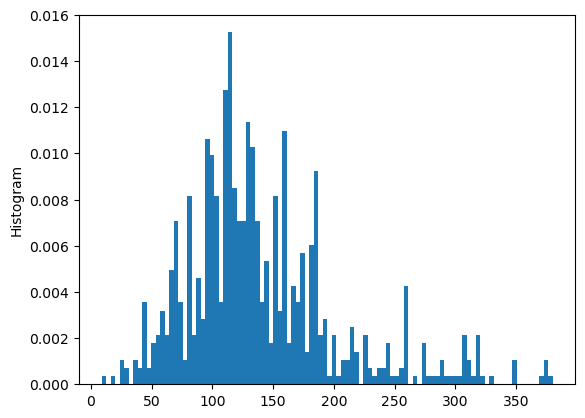

In [43]:
plt.hist(message['LoanAmount'], density=True, bins=100)
plt.ylabel('Histogram')


Text(0, 0.5, 'Histogram')

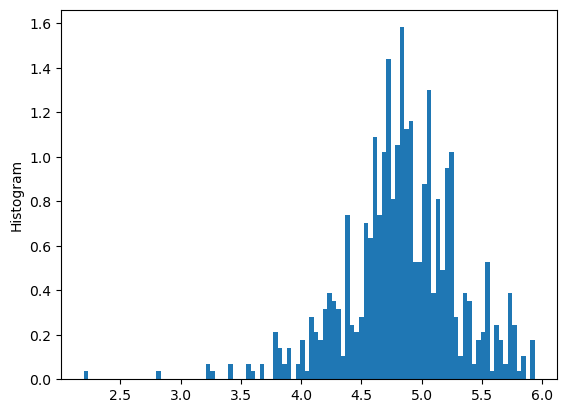

In [44]:
message['LoanAmount'] = np.log(message['LoanAmount'])
plt.hist(message['LoanAmount'], density=True, bins=100)
plt.ylabel('Histogram')


In [45]:
fig = px.box(px.data.tips(), y = message.LoanAmount, points="all")
fig.show()

Combine both incomes as total income and take a log transformation of the same.

In [46]:
message['Total_Income'] = message['ApplicantIncome'] + message['CoapplicantIncome']
message = message.drop(['ApplicantIncome', 'CoapplicantIncome'], axis = 1)
message.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP002236,Male,Yes,2,Graduate,No,4.605170,360.0,1.0,Urban,N,4566
2,LP001711,Male,Yes,3+,Graduate,No,4.852030,360.0,0.0,Semiurban,N,4680
3,LP002130,Male,Yes,NaN,Not Graduate,No,5.023881,360.0,0.0,Rural,N,6753


Text(0, 0.5, 'Histogram')

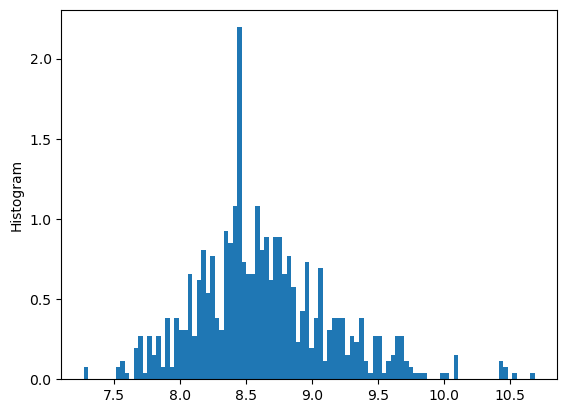

In [47]:
message['Total_Income'] = np.log(message['Total_Income'])
plt.hist(message['Total_Income'], density=True, bins=100)
plt.ylabel('Histogram')

## 4. Building a Predictive Model

In [48]:
#features selection
tab_model = message[['Loan_Status', 'Credit_History', 'Self_Employed',
                     'Total_Income', 'LoanAmount' , 'Property_Area', 'Education'
                     ]].reset_index(drop=True)

tab_model

,Loan_Status,Credit_History,Self_Employed,Total_Income,LoanAmount,Property_Area,Education
0,N,1.0,No,8.426393,4.605170,Urban,Graduate
1,N,0.0,No,8.451053,4.852030,Semiurban,Graduate
2,N,0.0,No,8.817742,5.023881,Rural,Not Graduate
3,N,0.0,No,8.713582,4.787492,Urban,Graduate
4,N,0.0,No,8.541691,4.820282,Rural,Graduate
...,...,...,...,...,...,...,...
755,Y,1.0,No,8.552946,4.682131,Rural,Graduate
756,Y,1.0,No,7.972466,4.262680,Rural,Graduate
757,Y,1.0,No,8.320205,3.688879,Rural,Graduate
758,Y,1.0,No,9.025456,5.533389,Urban,Graduate


In [50]:
#changing the type of the target variable to integer
tab_model['Loan_Status'] = tab_model['Loan_Status'] == 'Y'
tab_model['Education'] = tab_model.Education.map({'Graduate':0, 'Not Graduate':1})
tab_model['Self_Employed'] = tab_model.Self_Employed.map({'Yes':0, 'No':1})
tab_model['Property_Area'] = tab_model.Property_Area.map({'Urban':0, 'Rural':1, 'Semiurban':2})
tab_model['Credit_History'] = tab_model.Credit_History.astype('int64')
tab_model

,Loan_Status,Credit_History,Self_Employed,Total_Income,LoanAmount,Property_Area,Education
0,False,1,1,8.426393,4.605170,0,0
1,False,0,1,8.451053,4.852030,2,0
2,False,0,1,8.817742,5.023881,1,1
3,False,0,1,8.713582,4.787492,0,0
4,False,0,1,8.541691,4.820282,1,0
...,...,...,...,...,...,...,...
755,True,1,1,8.552946,4.682131,1,0
756,True,1,1,7.972466,4.262680,1,0
757,True,1,1,8.320205,3.688879,1,0
758,True,1,1,9.025456,5.533389,0,0


In [51]:
tab_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_Status     760 non-null    bool   
 1   Credit_History  760 non-null    int64  
 2   Self_Employed   760 non-null    int64  
 3   Total_Income    760 non-null    float64
 4   LoanAmount      760 non-null    float64
 5   Property_Area   760 non-null    int64  
 6   Education       760 non-null    int64  
dtypes: bool(1), float64(2), int64(4)
memory usage: 36.5 KB


In [52]:
#shuffling and splitting the dataset
X_train, y_train = tab_model.iloc[:,1:], tab_model['Loan_Status']


train_ratio = 0.7
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, shuffle=True, 
                                                    train_size=train_ratio,
                                                    random_state=42)

print(f'{len(X_train)} training samples and {len(X_test)} test samples')

532 training samples and 228 test samples


Model score on training data: 1.0
Model score on testing data: 0.8991228070175439
Model F1 score:
 0.8866995073891626
Balance of classes:
 Counter({False: 121, True: 107})

Percentage True: 0.4692982456140351


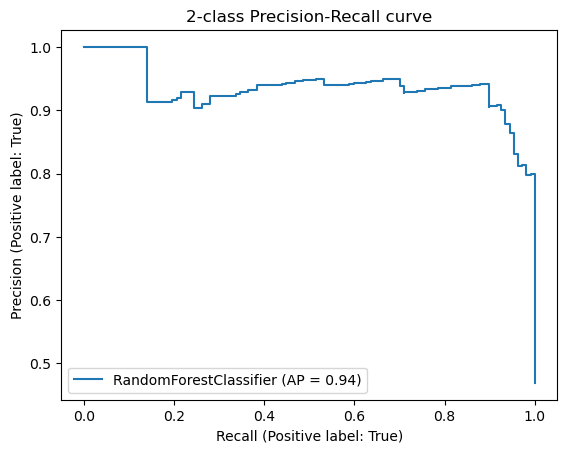

In [53]:
#train random forest
model = RandomForestClassifier()
model = model.fit(X_train, y_train)
test_function(model, X_test, y_test, 'RandomForestClassifier', X_train, y_train)

Try paramater grid search to improve the results

In [55]:
# setting random parameters for random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = random_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')
grid_search = grid_search.fit(X_train, y_train)

# assess the score
grid_search.best_score_, grid_search.best_params_


Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


(0.8363803719926364,
 {'bootstrap': True,
  'max_depth': 100,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200})

Model score on training data: 1.0
Model score on testing data: 0.881578947368421
Model F1 score:
 0.864321608040201
Balance of classes:
 Counter({False: 121, True: 107})

Percentage True: 0.4692982456140351


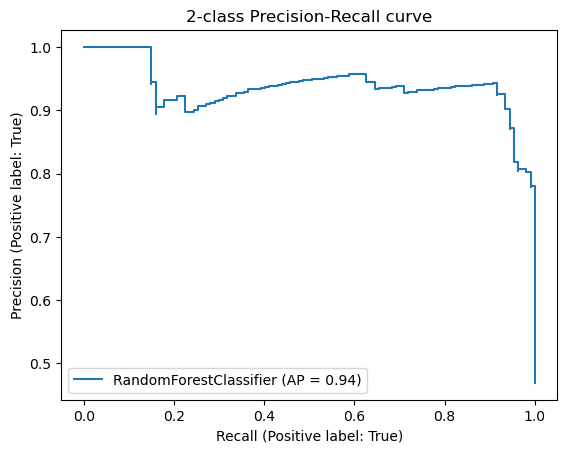

In [56]:
#training random forest with the best parameters
model = RandomForestClassifier ( n_estimators = 200,
                                 min_samples_split = 2,
                                 min_samples_leaf = 1,
                                 max_features = 'sqrt',
                                 max_depth = 100,
                                 bootstrap = True)
model = model.fit(X_train, y_train)

#assess score
test_function(model, X_test, y_test, 'RandomForestClassifier', X_train, y_train)


In [57]:
#run a simulation on random forest
results = []
for _ in range(1000):
    #create simulation table of 1000 applicants
    df1 = pd.DataFrame(np.random.randint(0,2,size=(1000, 1)), columns= ['Credit_History'])
    df2 = pd.DataFrame(np.random.randint(0,2,size=(1000, 1)), columns= ['Self_Employed'])
    df3 = pd.DataFrame(np.random.uniform(7, 12, 1000), columns= ['Total_Income'])
    df4 = pd.DataFrame(np.random.uniform(2, 7, 1000), columns= ['LoanAmount'])
    df5 = pd.DataFrame(np.random.randint(0,3,size=(1000, 1)), columns= ['Property_Area'])
    df6 = pd.DataFrame(np.random.randint(0,2,size=(1000, 1)), columns= ['Education'])
    table = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
    
    #prediction
    prediction = list(model.predict(table))
    table['Loan_Status'] = prediction
    
    #collecting results
    results.append(Counter(table.Loan_Status)[True]/len(table.Loan_Status))

pd.DataFrame(results).describe()

,0
count,1000.000000
mean,0.384272
std,0.015334
min,0.337000
25%,0.374000
50%,0.384000
75%,0.394000
max,0.432000


The model keeps a steady balance of classes

Model score on training data: 1.0
Model score on testing data: 0.8770491803278688
Model F1 score:
 0.8846153846153846
Balance of classes:
 Counter({1: 125, 0: 119})

Percentage True: 0.5122950819672131

Confusion matrix:
 [[115  10]
 [ 20  99]]


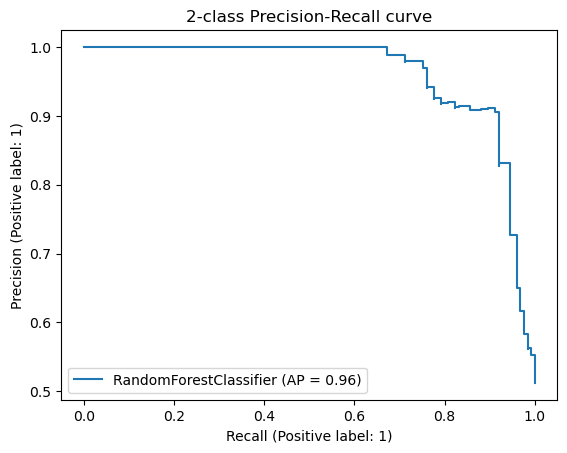

In [7]:
#cleaning the data
message1 = pd.read_csv(path+'/data/data.csv')
message1 = message1.dropna(subset=['LoanAmount'])

#resampling to balance the classes
# Separate majority and minority classes
max_class = message1[message1.Loan_Status == "Y"]
min_class = message1[message1.Loan_Status == "N"]
 
# Upsampling minotiry class
tab_min = resample(min_class, 
                   n_samples = 400,
                   random_state=123)
 
# Combine minority class with downsampled majority class
message1 = pd.concat([tab_min, max_class])
message1 = message1.reset_index(drop=True)

message1.loc[(message1.Loan_Status == 'Y')&(message1.Credit_History.isnull()), 'Credit_History'] = 1
message1.loc[(message1.Loan_Status == 'N')&(message1.Credit_History.isnull()), 'Credit_History'] = 0

#features engineering
feats = prepare_feat()
result = feats.fit(message1)

#shuffling the data
x_train, y_train = result.drop(['Loan_Status'], axis=1), result['Loan_Status']

train_ratio = 0.7
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, shuffle=True, 
                                                    train_size = train_ratio,
                                                    random_state = 42)

#training the model
model = RandomForestClassifier ( n_estimators = 200,
                                 min_samples_split = 2,
                                 min_samples_leaf = 1,
                                 max_features = 'sqrt',
                                 max_depth = 100,
                                 bootstrap = True)

model = model.fit(x_train, y_train)

#assess score
test_function(model, x_test, y_test, 'RandomForestClassifier', x_train, y_train)



In [8]:
# saving model
import pickle
with open('loan_predict.pickle', 'wb') as f:  
    pickle.dump(model, f)
